***
<font size="6"><center><b> HD-CapsNet: A Hierarchical Deep Capsule Network for Image Classification </b></center></font>
***

**Changing Model Architecture**
- **(Mod-3.1)** 32D>16D>8D (Coarse>Medium>FINE) use skip connections between Secondary Capsules $Concatenate([P_{caps}, S_{coarse}])$ > input for $S_{medium}$ and $Concatenate([P_{caps}, S_{medium}])$ > input for $S_{fine}$
- With $L_{Cons}$

# Files and Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras import backend as K

import tensorflow_docs as tfdocs
import tensorflow_docs.plots

# Supporting Libraries:
    #Mathplot lib for ploting graphs
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
    # numpy and pandas
import numpy as np
import pandas as pd
    #system
import os
import sys
import csv
    #import other libraries
import math
import random
from datetime import datetime
from treelib import Tree
    # ML model, Dataset and evalution metrics
sys.path.append('../../') ### adding system parth for src folder
from src import datasets # load datasets
from src import MixUp # load datasets
from src import MixUp_add_loss # load datasets
from src import metrics # load hierarchcial metrics
from src import sysenv # load hierarchcial metrics
from src import models # load machine learning models

    ## Tensorflow_docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots

    # Auto reload local libraries if updated
%load_ext autoreload
%autoreload 2

# System information & GPU growth

In [2]:
systeminfo = sysenv.systeminfo()
print(systeminfo)


• Computer Name = 30BFPC1AXW95
• Working Directory = C:\Users\knoor\Downloads\temp\HD-CapsNet\Training_and_Analysis\4_Marin_Tree
• Python Version = 3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]
• TensorFlow Version = 2.8.0
• Keras Version = 2.8.0
• Current Environment = Anaconda Environment Name : py38tf


In [3]:
gpus = "0,1,2,3,4,5,6,7" ## Selecting Available gpus (Multi-GPUS)
gpus = "0" ## Selecting Available gpus (Single GPU)
gpugrowth = sysenv.gpugrowth(gpus = gpus) ## Limiting GPUS from OS environment
gpugrowth.memory_growth() #GPU memory growth

Following GPUS are selected =  0
Done: GPU PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
1 Physical GPUs, 1 Logical GPUs


# Parameters

In [4]:
train_params = {"n_epochs" : 100,
                "batch_size": 64,
                "lr": 0.001, # Initial learning rate
                "lr_decay": 0.95, # Learning rate decay
                "decay_exe": 9, #learning rate decay execution epoch after
               }
model_params = {"optimizer": tf.keras.optimizers.Adam(train_params['lr']),
                "loss_function": models.MarginLoss(),
               }

# log directory

In [5]:
directory = sysenv.log_dir('7_Marine_Tree/HD_CapsNet/HD_CapsNet')

# Import Dataset : Marine Tree Dataset

In [6]:
dataset = datasets.get_Marine_dataset(output_level='level_depth_3', # 'level_depth_3', 'level_depth_4', 'level_depth_5
                                      dataset_path ='D:\Datasets\Marine_tree', ## Path to the dataset directory
                                    #   dataset_path ='/home/knoor/Downloads/RunningOnServer/H-CapsNet_Revision/Dataset/Marine_tree', ## Path to the dataset directory
                                      image_size=(64,64),
                                      batch_size=train_params['batch_size'],
                                      subtype='Combined',
                                      data_normalizing ='normalize',
                                      class_encoding = 'One_Hot_Encoder',
                                      data_augmantation = 'mixup'
                                     )

Example =  0


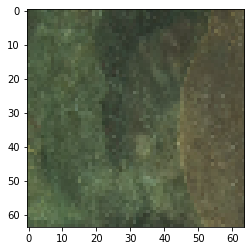

Coarse = {0: 1.0}
Medium = {1: 0.47625476, 7: 0.52374524}
Fine   = {32: 0.47625476, 36: 0.52374524}
Example =  1


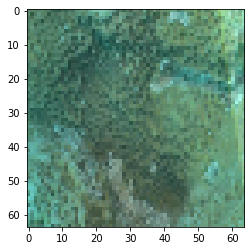

Coarse = {0: 1.0}
Medium = {1: 0.71775174, 7: 0.28224826}
Fine   = {7: 0.28224826, 32: 0.71775174}
Example =  2


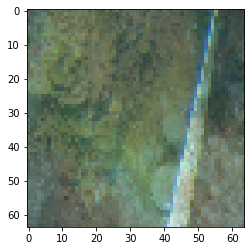

Coarse = {0: 1.0}
Medium = {1: 0.4638425, 7: 0.5361575}
Fine   = {4: 0.5361575, 32: 0.4638425}
Example =  3


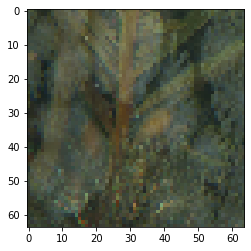

Coarse = {0: 1.0}
Medium = {1: 0.31445694, 7: 0.68554306}
Fine   = {32: 0.31445694, 33: 0.68554306}
Example =  4


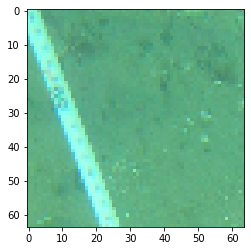

Coarse = {0: 2.0116286e-09, 1: 1.0}
Medium = {7: 2.0116286e-09, 9: 1.0}
Fine   = {4: 2.0116286e-09, 15: 1.0}
Example =  5


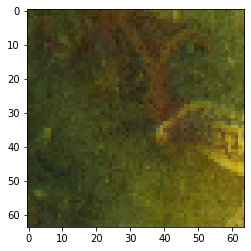

Coarse = {0: 0.8077851, 1: 0.1922149}
Medium = {7: 0.8077851, 9: 0.1922149}
Fine   = {4: 0.8077851, 12: 0.1922149}
Example =  6


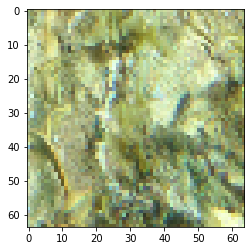

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  7


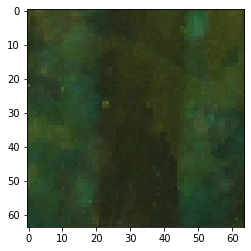

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  8


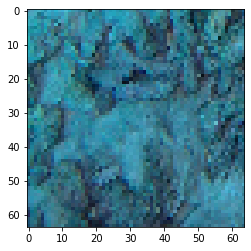

Coarse = {0: 0.02067715, 1: 0.97932285}
Medium = {7: 0.02067715, 9: 0.97932285}
Fine   = {15: 0.97932285, 33: 0.02067715}
Example =  9


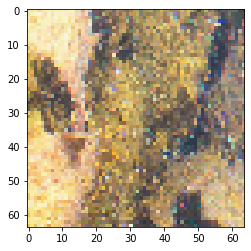

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {1: 0.024157733, 33: 0.97584224}
Example =  10


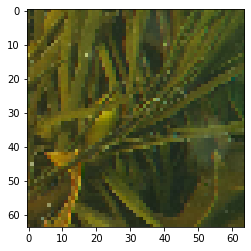

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  11


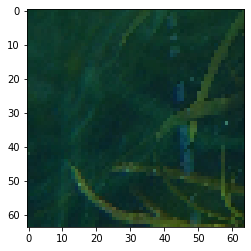

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  12


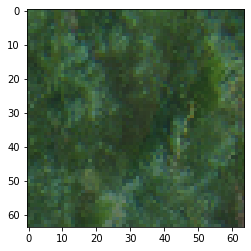

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.3432008, 33: 0.6567992}
Example =  13


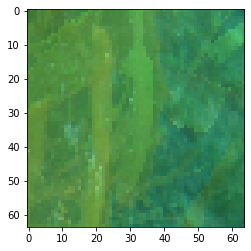

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  14


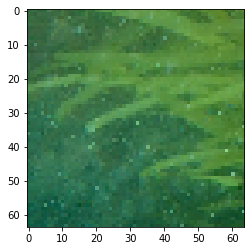

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 7.748604e-07, 33: 0.9999992}
Example =  15


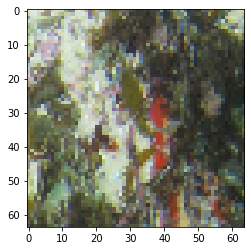

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.9426161, 6: 0.057383895}
Example =  16


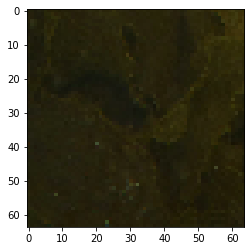

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.03923601, 33: 0.960764}
Example =  17


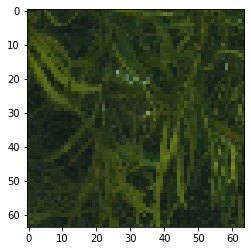

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  18


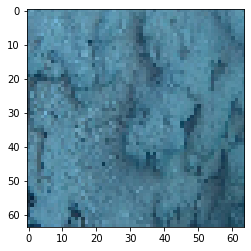

Coarse = {1: 1.0}
Medium = {9: 1.0}
Fine   = {14: 0.0005866885, 15: 0.9994133}
Example =  19


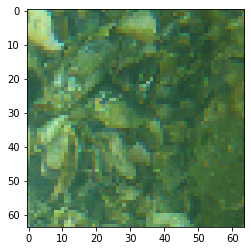

Coarse = {0: 0.0056450963, 1: 0.9943549}
Medium = {7: 0.0056450963, 9: 0.9943549}
Fine   = {11: 0.9943549, 36: 0.0056450963}
Example =  20


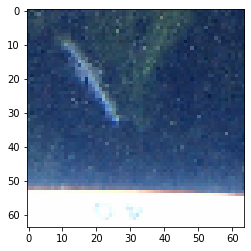

Coarse = {0: 1.0}
Medium = {1: 8.3822466e-05, 7: 0.9999162}
Fine   = {1: 0.9999162, 32: 8.3822466e-05}
Example =  21


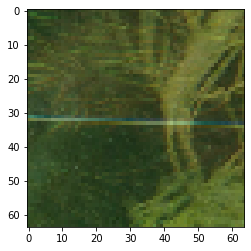

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.6256702, 4: 0.3743298}
Example =  22


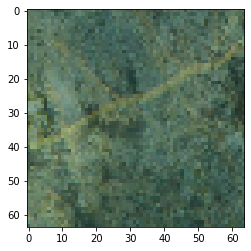

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.56435907, 33: 0.43564093}
Example =  23


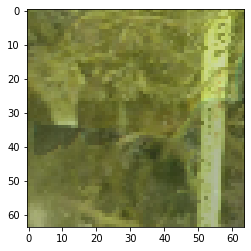

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  24


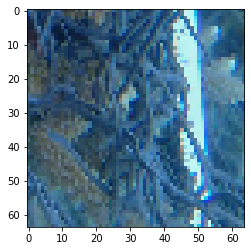

Coarse = {0: 1.0}
Medium = {0: 0.9301918, 1: 0.06980817}
Fine   = {29: 0.9301918, 32: 0.06980817}
Example =  25


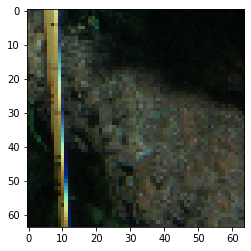

Coarse = {0: 1.0}
Medium = {1: 0.9969618, 7: 0.0030382387}
Fine   = {10: 0.0030382387, 32: 0.9969618}
Example =  26


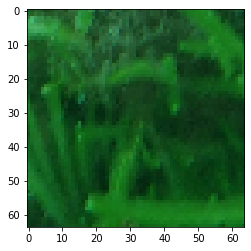

Coarse = {0: 1.0}
Medium = {6: 0.00020549717, 7: 0.9997945}
Fine   = {1: 0.9997945, 25: 0.00020549717}
Example =  27


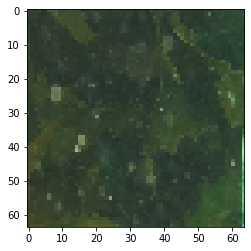

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {4: 0.0005213618, 33: 0.99947864}
Example =  28


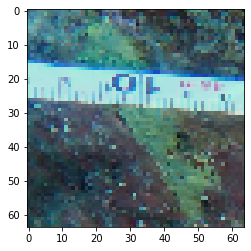

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.8851398, 33: 0.11486021}
Example =  29


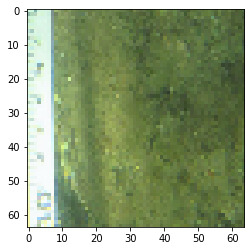

Coarse = {0: 0.9745647, 1: 0.025435355}
Medium = {7: 0.9745647, 9: 0.025435355}
Fine   = {10: 0.9745647, 14: 0.025435355}
Example =  30


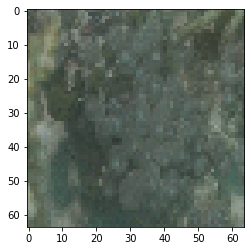

Coarse = {0: 1.0}
Medium = {5: 0.90897465, 7: 0.09102535}
Fine   = {10: 0.09102535, 17: 0.90897465}
Example =  31


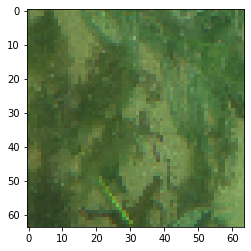

Coarse = {0: 0.08633369, 1: 0.9136663}
Medium = {1: 0.08633369, 9: 0.9136663}
Fine   = {15: 0.9136663, 32: 0.08633369}
Example =  32


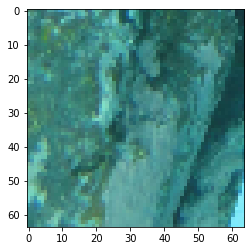

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.99987614, 34: 0.00012387184}
Example =  33


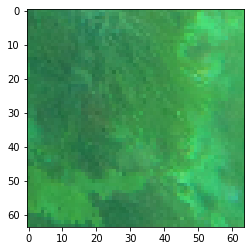

Coarse = {0: 1.0}
Medium = {3: 0.12555592, 7: 0.87444407}
Fine   = {26: 0.12555592, 33: 0.87444407}
Example =  34


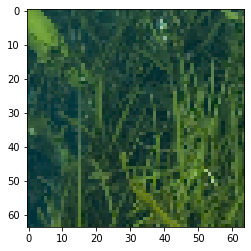

Coarse = {0: 1.0}
Medium = {6: 8.523464e-06, 7: 0.9999915}
Fine   = {25: 8.523464e-06, 33: 0.9999915}
Example =  35


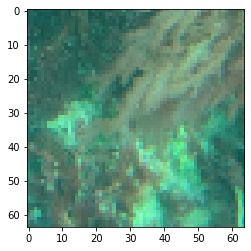

Coarse = {0: 0.99998915, 1: 1.0865334e-05}
Medium = {7: 0.99998915, 9: 1.0865334e-05}
Fine   = {4: 0.99998915, 15: 1.0865334e-05}
Example =  36


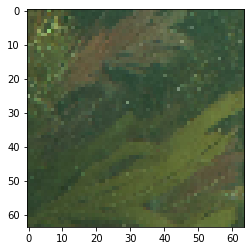

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  37


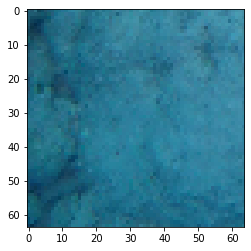

Coarse = {0: 0.0058350633, 1: 0.99416494}
Medium = {7: 0.0058350633, 9: 0.99416494}
Fine   = {15: 0.99416494, 33: 0.0058350633}
Example =  38


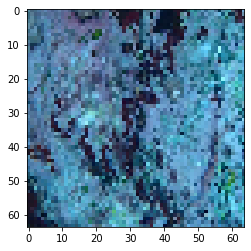

Coarse = {0: 1.0}
Medium = {5: 0.014778738, 7: 0.98522127}
Fine   = {7: 0.98522127, 16: 0.014778738}
Example =  39


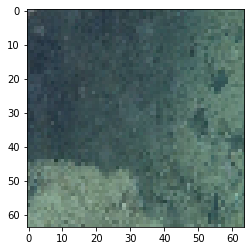

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {4: 0.0435735, 10: 0.9564265}
Example =  40


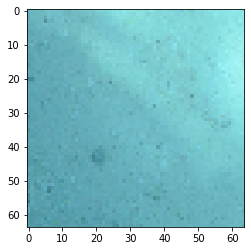

Coarse = {0: 0.00070508616, 1: 0.99929494}
Medium = {1: 0.00070508616, 9: 0.99929494}
Fine   = {15: 0.99929494, 32: 0.00070508616}
Example =  41


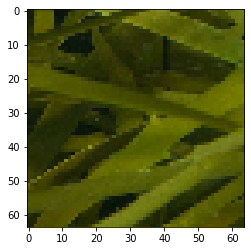

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 3.1499334e-05, 33: 0.9999685}
Example =  42


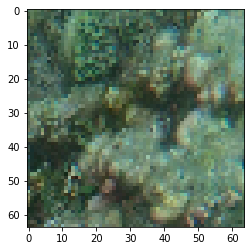

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 1.0}
Example =  43


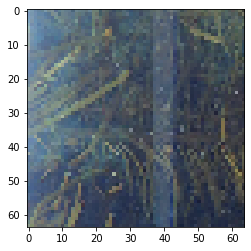

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {4: 0.16057861, 33: 0.8394214}
Example =  44


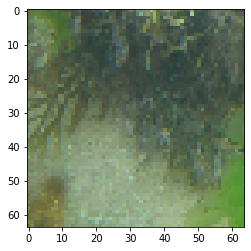

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 0.98601943, 35: 0.013980589}
Example =  45


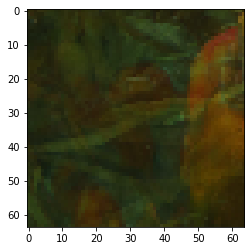

Coarse = {0: 1.0}
Medium = {5: 0.59823036, 7: 0.40176964}
Fine   = {16: 0.59823036, 33: 0.40176964}
Example =  46


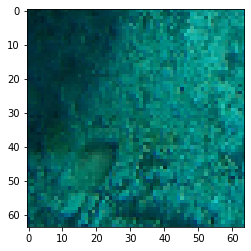

Coarse = {1: 1.0}
Medium = {9: 1.0}
Fine   = {11: 0.03769892, 14: 0.9623011}
Example =  47


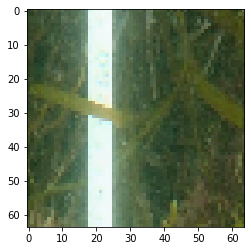

Coarse = {0: 1.0}
Medium = {1: 0.036531985, 7: 0.963468}
Fine   = {32: 0.036531985, 33: 0.963468}
Example =  48


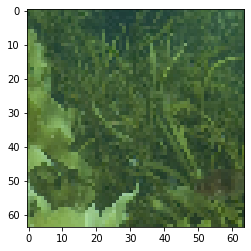

Coarse = {0: 0.99637586, 1: 0.0036241412}
Medium = {7: 0.99637586, 9: 0.0036241412}
Fine   = {15: 0.0036241412, 33: 0.99637586}
Example =  49


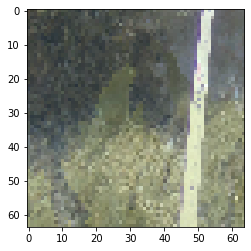

Coarse = {0: 0.38141775, 1: 0.61858225}
Medium = {7: 0.38141775, 9: 0.61858225}
Fine   = {11: 0.61858225, 33: 0.38141775}
Example =  50


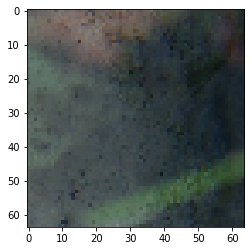

Coarse = {0: 1.0}
Medium = {0: 0.41374242, 7: 0.5862576}
Fine   = {10: 0.5862576, 31: 0.41374242}
Example =  51


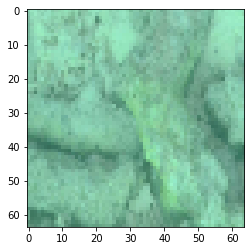

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 1.0, 33: 4.979426e-09}
Example =  52


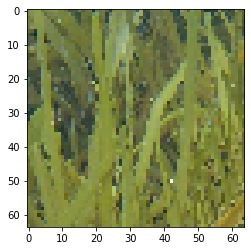

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  53


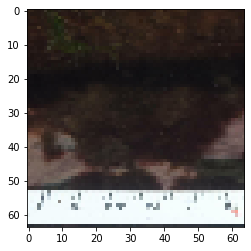

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 1.0}
Example =  54


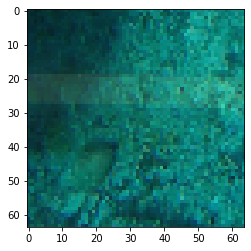

Coarse = {1: 1.0}
Medium = {9: 1.0}
Fine   = {14: 0.87795615, 37: 0.12204385}
Example =  55


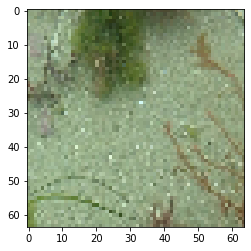

Coarse = {0: 0.014687657, 1: 0.98531234}
Medium = {7: 0.014687657, 9: 0.98531234}
Fine   = {7: 0.014687657, 15: 0.98531234}
Example =  56


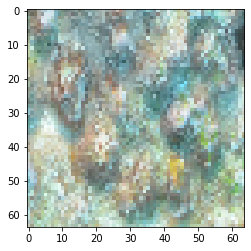

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {4: 7.719906e-06, 10: 0.99999225}
Example =  57


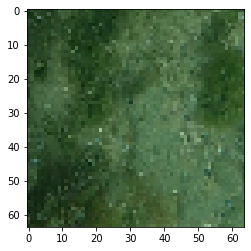

Coarse = {0: 2.4686944e-08, 1: 1.0}
Medium = {7: 2.4686944e-08, 9: 1.0}
Fine   = {0: 2.4686944e-08, 15: 1.0}
Example =  58


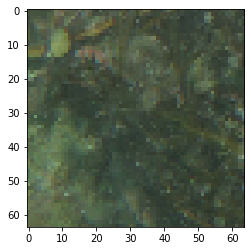

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {10: 0.001270082, 33: 0.99872994}
Example =  59


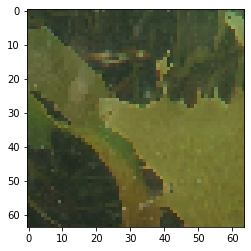

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  60


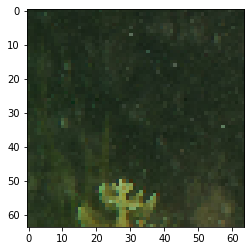

Coarse = {0: 1.0}
Medium = {1: 0.0032674074, 7: 0.9967326}
Fine   = {0: 0.9967326, 32: 0.0032674074}
Example =  61


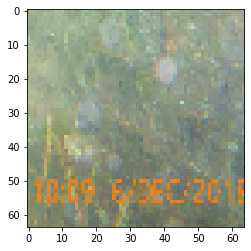

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  62


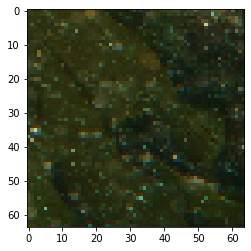

Coarse = {0: 1.0}
Medium = {1: 6.0908025e-07, 7: 0.9999994}
Fine   = {32: 6.0908025e-07, 33: 0.9999994}
Example =  63


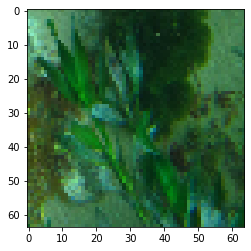

Coarse = {0: 1.0}
Medium = {6: 0.99841404, 7: 0.0015859475}
Fine   = {25: 0.99841404, 33: 0.0015859475}


In [7]:
for x,y in dataset.train_dataset.take(1):
    for i in range(len(x)):
        print('Example = ', i)
        plt.imshow(x[i])
        plt.show()
        print('Coarse =', {k:v for k,v in enumerate(y[0][i].numpy()) if v != 0}) # coarse lables
        print('Medium =', {k:v for k,v in enumerate(y[1][i].numpy()) if v != 0}) # medium lables
        print('Fine   =', {k:v for k,v in enumerate(y[2][i].numpy()) if v != 0}) # fine lables

In [8]:
for x,y in dataset.train_dataset.take(1):
    image_shape = x.shape[1:]
    coarse_label_shape = y[0].shape[1:]
    medium_label_shape = y[1].shape[1:]
    fine_label_shape = y[2].shape[1:]

## Learning Rate Decay Scheduler

In [9]:
def scheduler(epoch):
    learning_rate_init = train_params["lr"]
    
    if epoch > train_params["decay_exe"]:
        learning_rate_init = train_params["lr"] * (train_params["lr_decay"] ** (epoch-9))
        
    tf.summary.scalar('learning rate', data=learning_rate_init, step=epoch)
        
    return learning_rate_init

# Model Architecture

## Loss Function

In [10]:
coarse_class, medium_class, fine_class = dataset.num_classes

## For Dynamic LossWeights
initial_lw = models.initial_lw({"coarse": coarse_class,
                                 "medium": medium_class,
                                 "fine": fine_class})

lossweight = {'coarse_lw' : K.variable(value = initial_lw['coarse'], dtype="float32", name="coarse_lw"),
             'medium_lw' : K.variable(value = initial_lw['medium'], dtype="float32", name="medium_lw"),
             'fine_lw' : K.variable(value = initial_lw['fine'], dtype="float32", name="fine_lw"),
              'decoder_lw' : 0.0
             }

In [11]:
Matrix_coarse_to_medium_OneHot = dataset.Matrix_coarse_to_medium_OneHot
Matrix_medium_to_fine_OneHot = dataset.Matrix_medium_to_fine_OneHot

In [12]:
def margin_loss(y_true, y_proba):
    
    present_error_raw = tf.square(tf.maximum(0., 0.9 - y_proba), name="present_error_raw")
    absent_error_raw = tf.square(tf.maximum(0., y_proba - 0.1), name="absent_error_raw")
    L = tf.add(y_true * present_error_raw, 0.5 * (1.0 - y_true) * absent_error_raw,name="L")
    total_marginloss = tf.reduce_sum(L, axis=1, name="margin_loss")

    return total_marginloss


def consistency_check(y_pred_ancestor,y_pred_current,lookup_matrix,num_class_current):
    pred_max_ancestor = tf.argmax(y_pred_ancestor,axis=1)
    pred_max_current = tf.argmax(y_pred_current,axis=1)
    
    consistant_check = tf.gather(lookup_matrix, indices=pred_max_ancestor)*tf.one_hot(pred_max_current,num_class_current)
    
    return tf.reduce_sum(consistant_check,1)

def get_consistency(y_true_ancestor, y_pred, lookup_matrix):
    '''
    Get consistency based on 2 levels
    Provide ture levels for the level above, predictions for the current level and a look up metrix
    '''
    y_prob = tf.math.divide(y_pred,tf.reshape(tf.reduce_sum(y_pred,-1),(-1,1),name='reshape'),name='Probability')
    
    index_for_predictions = tf.cast(tf.math.argmax(y_true_ancestor,axis=1),dtype= 'int32')
    consistent_fine = tf.gather(lookup_matrix, indices=index_for_predictions) * y_prob
    Consistency_sum_array = tf.reduce_sum(consistent_fine, axis =1)
    
    return tf.abs(1-Consistency_sum_array)

def CustomLoss(y_true_c, y_true_m, y_true_f, y_pred_c, y_pred_m, y_pred_f, LW_C, LW_M, LW_F,
               number_of_classes_m, number_of_classes_f, C_Weight=0.2):
    
    con_m = consistency_check(y_pred_c,y_pred_m,Matrix_coarse_to_medium_OneHot,num_class_current=number_of_classes_m)
    con_m_not = tf.abs(con_m-1)
    
    con_f = consistency_check(y_pred_m,y_pred_f,Matrix_medium_to_fine_OneHot,num_class_current=number_of_classes_f)
    con_f_not = tf.abs(con_f-1)
    
    con_sum_m = get_consistency(y_true_c,y_pred_m,Matrix_coarse_to_medium_OneHot)
    con_sum_f = get_consistency(y_true_m,y_pred_f,Matrix_medium_to_fine_OneHot)
    
    medium_lvl_cosistency = con_sum_m * con_m_not
    fine_lvl_cosistency = con_sum_f * con_f_not    
   
    ML_c = margin_loss(y_true_c, y_pred_c)*LW_C
    ML_m = LW_M*((1-C_Weight)*(margin_loss(y_true_m, y_pred_m))+C_Weight*(medium_lvl_cosistency))
    ML_f = LW_F*((1-C_Weight)*(margin_loss(y_true_f, y_pred_f))+C_Weight*(fine_lvl_cosistency))
    
    batch_loss = ML_c + ML_m+ ML_f

    return tf.reduce_mean(batch_loss)

## Architecture

In [13]:
def get_compiled_model():
    
    ## Calling the HD-CapsNet Model
    model = models.HD_CapsNet_Mod_3_3(input_shape     = image_shape, 
                                      input_shape_yc  = coarse_label_shape,
                                      input_shape_ym  = medium_label_shape,
                                      input_shape_yf  = fine_label_shape, 
                                      no_coarse_class = coarse_class, 
                                      no_medium_class = medium_class, 
                                      no_fine_class   = fine_class,
                                      PCap_n_dims     = 8, 
                                      SCap_f_dims     = 16, 
                                      SCap_m_dims     = 32, 
                                      SCap_c_dims     = 64)
    
    ## Saving Model Architecture
    keras.utils.plot_model(model, to_file = directory+"/Architecture.png", show_shapes=True)
    
    ## Add Loss for Model
    model.add_loss(CustomLoss(y_true_c            = model.inputs[1], 
                              y_true_m            = model.inputs[2], 
                              y_true_f            = model.inputs[3], 
                              y_pred_c            = model.output[0], 
                              y_pred_m            = model.output[1], 
                              y_pred_f            = model.output[2], 
                              LW_C                = lossweight['coarse_lw'], 
                              LW_M                = lossweight['medium_lw'], 
                              LW_F                = lossweight['fine_lw'],
                              number_of_classes_m = medium_class, 
                              number_of_classes_f = fine_class, 
                              C_Weight            =0.2)
                  )
    
    ## Compile Model
    model.compile(optimizer='adam',                  
                  metrics={'prediction_fine': 'accuracy',
                           'prediction_medium': 'accuracy',
                           'prediction_coarse': 'accuracy'}
                 )
    return model

## Compile Model

In [14]:
model = get_compiled_model()

In [15]:
model.summary()
# keras.utils.plot_model(model, to_file = directory+"/Architecture.png", show_shapes=True)

Model: "HD-CapsNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Image (InputLayer)       [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 64, 64, 64)   1792        ['Input_Image[0][0]']            
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 64)  256         ['block1_conv1[0][0]']           
 alization)                                                                                       
                                                                                                  
 block1_conv2 (Conv2D)          (None, 64, 64, 64)   36928       ['batch_normalization[0]

                                                                                                  
 prediction_medium (LengthLayer  (None, 10)          0           ['s_caps_medium[0][0]']          
 )                                                                                                
                                                                                                  
 prediction_fine (LengthLayer)  (None, 38)           0           ['s_caps_fine[0][0]']            
                                                                                                  
 tf.math.argmax_4 (TFOpLambda)  (None,)              0           ['input_yc[0][0]']               
                                                                                                  
 tf.math.reduce_sum_2 (TFOpLamb  (None,)             0           ['prediction_medium[0][0]']      
 da)                                                                                              
          

 )                                                                                                
                                                                                                  
 tf.math.square_2 (TFOpLambda)  (None, 10)           0           ['tf.math.maximum_2[0][0]']      
                                                                                                  
 tf.math.multiply_11 (TFOpLambd  (None, 10)          0           ['tf.math.subtract_9[0][0]']     
 a)                                                                                               
                                                                                                  
 tf.math.square_3 (TFOpLambda)  (None, 10)           0           ['tf.math.maximum_3[0][0]']      
                                                                                                  
 tf.math.reduce_sum_3 (TFOpLamb  (None,)             0           ['tf.math.multiply_2[0][0]']     
 da)      

 )                                                                                                
                                                                                                  
 tf.math.multiply_6 (TFOpLambda  (None, 2)           0           ['input_yc[0][0]',               
 )                                                                'tf.math.square[0][0]']         
                                                                                                  
 tf.math.multiply_8 (TFOpLambda  (None, 2)           0           ['tf.math.multiply_7[0][0]',     
 )                                                                'tf.math.square_1[0][0]']       
                                                                                                  
 tf.math.reduce_sum_7 (TFOpLamb  (None,)             0           ['tf.math.add_1[0][0]']          
 da)                                                                                              
          

## Training Pipeline Alignment

In [16]:
#### Matching the pipeling with model inputs
def pipeline_multi_input_output(image, label):
    label_0 = label[0]
    label_1 = label[1]
    label_2 = label[2]
    return (image, label_0, label_1, label_2), (label_0, label_1, label_2)

training_dataset_match = dataset.train_dataset.map(pipeline_multi_input_output) ## Mixup dataset
val_dataset_match = dataset.val_dataset.map(pipeline_multi_input_output) ## Val Dataset

## Callback

In [17]:
tb = keras.callbacks.TensorBoard(directory+'./tb_logs'+ datetime.now().strftime("%Y%m%d-%H%M%S"))
log = keras.callbacks.CSVLogger(directory+'/log.csv', append=True)

checkpoint = keras.callbacks.ModelCheckpoint(directory+'/epoch-best.h5',
                                             monitor='val_prediction_fine_accuracy',
                                             save_best_only=True, 
                                             save_weights_only=True, 
                                             verbose=1)

change_lw = models.LossWeightsModifier(lossweight = lossweight,
                                       initial_lw = initial_lw,
                                       directory = directory)

lr_decay = keras.callbacks.LearningRateScheduler(scheduler)

## Model Training

In [18]:
model_save_dir = str(directory+'/trained_model.h5')
try:
    model.load_weights(model_save_dir)
except:
    history = model.fit(training_dataset_match,
                        epochs = train_params["n_epochs"],
                        validation_data = val_dataset_match,
                        callbacks = [tb,log,change_lw,lr_decay,checkpoint],
                        verbose=1)
    
    model.save_weights(model_save_dir)

In [19]:
try:
    history_dict = history.history

    plotter = tfdocs.plots.HistoryPlotter()
    plotter.plot({"Coarse": history}, metric = "prediction_coarse_accuracy")
    plotter.plot({"Medium": history}, metric = "prediction_medium_accuracy")
    plotter.plot({"Fine": history}, metric = "prediction_fine_accuracy")
    plt.title("Model Accuracy")
    plt.ylim([0,1])
except:
    print('Trained model weights loaded')

Trained model weights loaded


In [20]:
try:
    plotter = tfdocs.plots.HistoryPlotter()
    plotter.plot({"loss": history}, metric = "loss")
    plt.title("Model Loss")
    plt.ylim([0,1])
except:
    print('Trained model weights loaded')

Trained model weights loaded


## Model Analysis

In [21]:
final_model = keras.Model(model.inputs[:1], model.output)
final_model.load_weights(directory+'/epoch-best.h5')

lossfn = models.MarginLoss()
final_model.compile(optimizer='adam', 
                    loss={'prediction_fine' : lossfn,
                          'prediction_medium' : lossfn,
                          'prediction_coarse' : lossfn},

                    loss_weights={'prediction_fine' : lossweight['fine_lw'],
                                  'prediction_medium' : lossweight['medium_lw'],
                                  'prediction_coarse' : lossweight['coarse_lw']},

                    metrics={'prediction_fine': 'accuracy',
                             'prediction_medium': 'accuracy',
                             'prediction_coarse': 'accuracy'
                            }
                   )

In [22]:
results = final_model.evaluate(dataset.test_dataset)
for n in range(len(results)):
    print(str(n+1)+'.',final_model.metrics_names[n], '==>', results[n])
# model_predictions = final_model.predict(dataset.test_dataset)

419/419 [==============================] - 92s 206ms/step - loss: 0.1418 - prediction_coarse_loss: 0.0744 - prediction_medium_loss: 0.1692 - prediction_fine_loss: 0.3199 - prediction_coarse_accuracy: 0.8988 - prediction_medium_accuracy: 0.7860 - prediction_fine_accuracy: 0.5715
1. loss ==> 0.14178286492824554
2. prediction_coarse_loss ==> 0.07444676011800766
3. prediction_medium_loss ==> 0.1691640168428421
4. prediction_fine_loss ==> 0.31985634565353394
5. prediction_coarse_accuracy ==> 0.8987610936164856
6. prediction_medium_accuracy ==> 0.7859914898872375
7. prediction_fine_accuracy ==> 0.5715351700782776


In [23]:
def predict_from_pipeline(model, dataset):
    y_pred_c = []
    y_pred_m = []
    y_pred_f = []
    
    y_true_c = []
    y_true_m = []
    y_true_f = []
    for x, y in dataset:
        batch_pred = model.predict(x)
        
        y_true_c.extend(y[0].numpy().tolist())
        y_true_m.extend(y[1].numpy().tolist())
        y_true_f.extend(y[2].numpy().tolist())
        
        y_pred_c.extend(batch_pred[0].tolist())
        y_pred_m.extend(batch_pred[1].tolist())
        y_pred_f.extend(batch_pred[2].tolist())
        
    return np.array(y_true_c), np.array(y_true_m), np.array(y_true_f), np.array(y_pred_c), np.array(y_pred_m), np.array(y_pred_f)

In [24]:
y_true_c, y_true_m, y_true_f, y_pred_c, y_pred_m, y_pred_f = predict_from_pipeline(final_model, dataset.test_dataset)

  • Confusion_Matrix Level = 0 


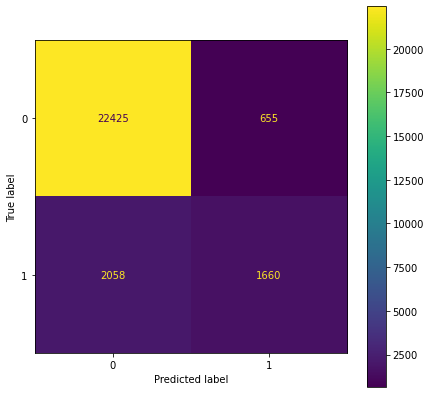


  • Classification Report for Level = 0 

              precision    recall  f1-score   support

           0    0.91594   0.97162   0.94296     23080
           1    0.71706   0.44648   0.55031      3718

    accuracy                        0.89876     26798
   macro avg    0.81650   0.70905   0.74663     26798
weighted avg    0.88835   0.89876   0.88848     26798

  • Confusion_Matrix Level = 1 


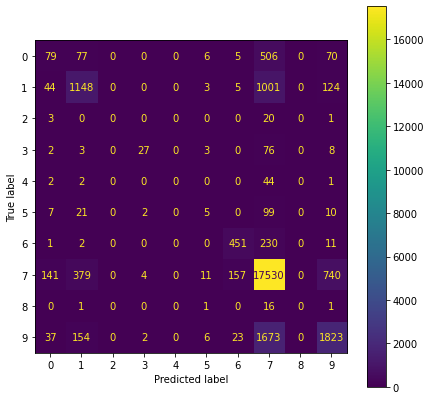


  • Classification Report for Level = 1 

              precision    recall  f1-score   support

           0    0.25000   0.10633   0.14920       743
           1    0.64242   0.49376   0.55837      2325
           2    0.00000   0.00000   0.00000        24
           3    0.77143   0.22689   0.35065       119
           4    0.00000   0.00000   0.00000        49
           5    0.14286   0.03472   0.05587       144
           6    0.70359   0.64892   0.67515       695
           7    0.82708   0.92448   0.87307     18962
           8    0.00000   0.00000   0.00000        19
           9    0.65364   0.49032   0.56032      3718

    accuracy                        0.78599     26798
   macro avg    0.39910   0.29254   0.32226     26798
weighted avg    0.76103   0.78599   0.76747     26798

  • Confusion_Matrix Level = 2 


C:\Users\knoor\.conda\envs\py38tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\knoor\.conda\envs\py38tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\knoor\.conda\envs\py38tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


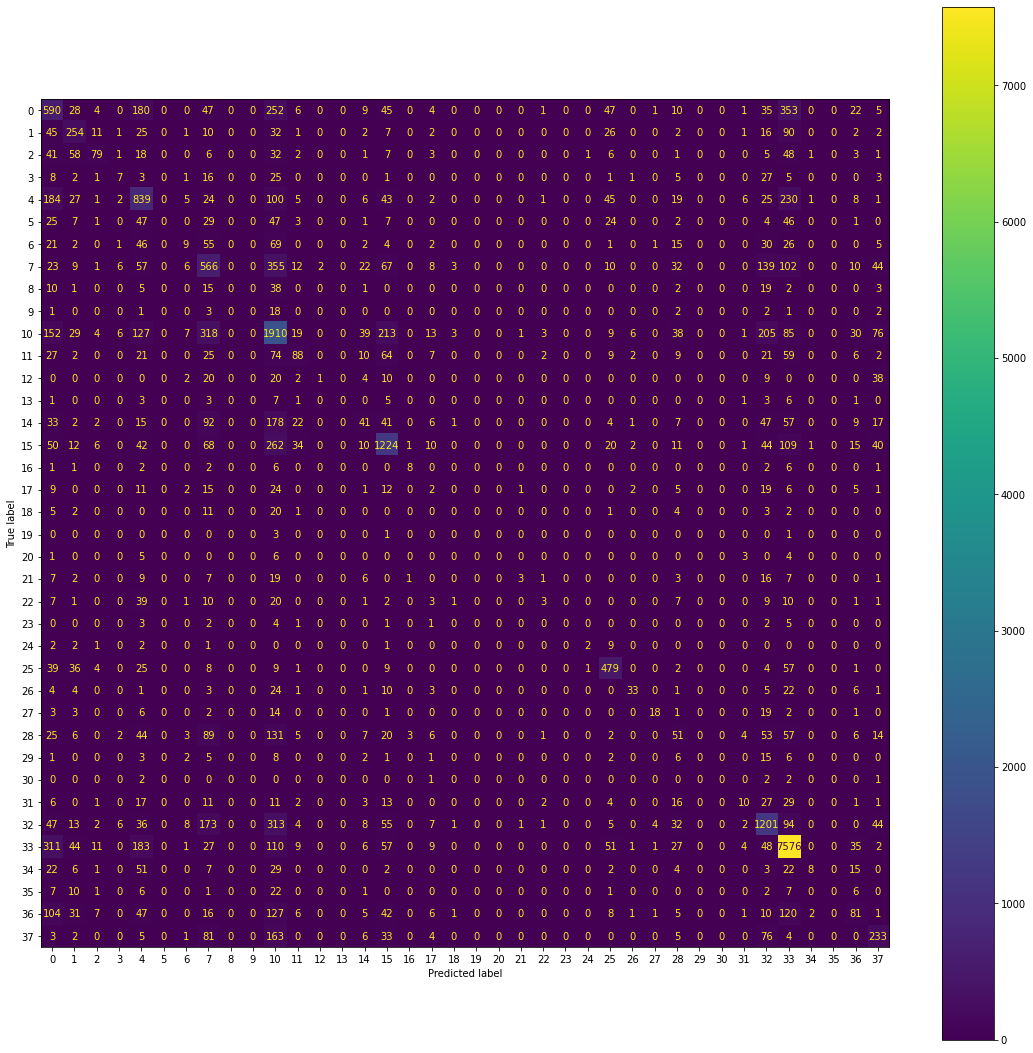


  • Classification Report for Level = 2 

              precision    recall  f1-score   support

           0    0.32507   0.35976   0.34153      1640
           1    0.42617   0.47925   0.45115       530
           2    0.57246   0.25159   0.34956       314
           3    0.21875   0.06604   0.10145       106
           4    0.43562   0.53304   0.47943      1574
           5    0.00000   0.00000   0.00000       244
           6    0.18367   0.03114   0.05325       289
           7    0.32014   0.38399   0.34917      1474
           8    0.00000   0.00000   0.00000        96
           9    0.00000   0.00000   0.00000        30
          10    0.42615   0.57984   0.49126      3294
          11    0.39111   0.20561   0.26953       428
          12    0.33333   0.00943   0.01835       106
          13    0.00000   0.00000   0.00000        31
          14    0.21026   0.07130   0.10649       575
          15    0.61261   0.62385   0.61818      1962
          16    0.61538   0.27586   0.

C:\Users\knoor\.conda\envs\py38tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\knoor\.conda\envs\py38tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\knoor\.conda\envs\py38tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
metrics.lvl_wise_metric([y_true_c, y_true_m, y_true_f],
                        [y_pred_c, y_pred_m, y_pred_f])

In [30]:
h_measurements,consistency,exact_match, get_performance_report = metrics.hmeasurements([y_true_c, y_true_m, y_true_f],
                                                                                        [y_pred_c, y_pred_m, y_pred_f],
                                                                                        dataset.get_tree())

get_performance_report = {**{'Dataset': 'Marine_Dataset',
                             'Model': 'HD-CapsNet'},
                             **get_performance_report
                             } # merging two dictionaries (adding Dataset and Model name)
performance_metrics = pd.DataFrame(pd.DataFrame(get_performance_report.values(), get_performance_report.keys(), columns = ['Value']))
performance_metrics.to_csv(os.path.join(directory,'performance_metrics.csv'))
display(performance_metrics)

,Value
Dataset,Marine_Dataset
Model,HD-CapsNet
Accuracy L_0,0.898761
Accuracy L_1,0.785991
Accuracy L_2,0.571535
HarmonicM_Accuracy_k1,0.725585
HarmonicM_Accuracy_k2,0.83916
HarmonicM_Accuracy_k5,0.921539
ArithmeticM_Accuracy_k1,0.752096
ArithmeticM_Accuracy_k2,0.860462
